In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2

print("loading models.....")
net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/computer vision project/IMPORTANT/colorization_deploy_v2.prototxt','/content/drive/MyDrive/computer vision project/IMPORTANT/colorization_release_v2.caffemodel')
pts = np.load('/content/drive/MyDrive/computer vision project/IMPORTANT/pts_in_hull.npy')


class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2,313,1,1)

net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float32')]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float16')]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float16')]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float16')]
net.getLayer(conv8).blobs = [np.full([1,313],2.606,dtype='float32')]



image = cv2.imread('/content/drive/MyDrive/computer vision project/IMPORTANT/College.JPG')
scaled = image.astype("float32")/255.0
lab = cv2.cvtColor(scaled,cv2.COLOR_BGR2LAB)


resized = cv2.resize(lab,(224,224))
L = cv2.split(resized)[0]
L -= 50


net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1,2,0))

ab = cv2.resize(ab, (image.shape[1],image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized,cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized,0,1)

colorized = (255 * colorized).astype("uint8")

# cv2.imshow("Original",image)
# cv2.imshow("Colorized",colorized)
# cv2.waitKey()
# cv2.destroyAllWindows()

loading models.....


(-0.5, 2453.5, 3578.5, -0.5)

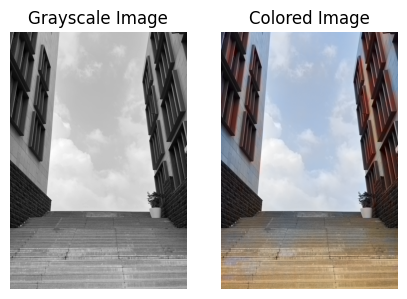

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,15))
plt.subplot(1,2,1)
plt.title('Grayscale Image')
plt.imshow(cv2.imread("/content/drive/MyDrive/computer vision project/IMPORTANT/College.JPG",0),cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Colored Image')
plt.imshow(cv2.cvtColor(colorized,cv2.COLOR_BGR2RGB))
plt.axis('off')